In [131]:
# STEP 0: Import packages
import numpy as np
import matplotlib.pyplot as plt

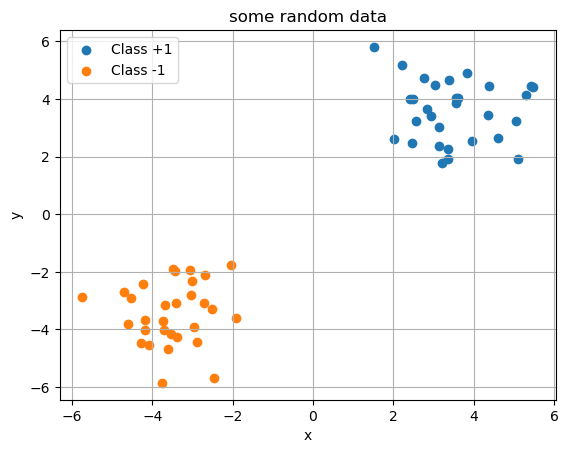

In [133]:
# STEP 1: Generate & visualize linearly seperable data (IF USING EXISTING DATA, SKIP THIS STEP.)
def generate_data(n=50, center_distance=5, random_seed=None):
    '''
    Generate some random 2D linearly separable data.
    User can specify random_seed if needed. 
    '''
    if random_seed is not None:
        np.random.seed(random_seed)

    # set the coordinate of the center so that the distance between the origin and the center aligns with user input
    center = center_distance / np.sqrt(2)
    # generate n points, each point has 2 coordinates (x and y). By default, mean = 0, sd = 1 
    X1 = np.random.randn(n, 2) + np.array([center, center])
    X2 = np.random.randn(n, 2) + np.array([-center, -center])
    X = np.vstack([X1, X2])
    y = np.hstack([np.ones(n), -np.ones(n)])
    return X, y

def visualize_data(X, y, title="some random data"):
    '''
    Visualize the generated data (or data from elsewhere) as a scatterplot using matplotlib. 
    '''
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Class -1')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

X, y = generate_data(n=30, center_distance=5, random_seed=160)
visualize_data(X, y)

In [135]:
# STEP 2: Train SVM
def train_svm(X, y, lr=0.001, gens=1000):
    '''
    Train a simple hard-margin linear SVM.
    'lr': learning rate. how big each update is?
    'gens': how many times to loop through the data? 
    Also there's an early stop condition (>=1)
    '''
    n_samples, n_features = X.shape
    # initialize weights and bias as 0
    w = np.zeros(n_features) # w = [0,0]
    b = 0

    for gen in range(gens):
        for i in range(n_samples):
            # Check SVM constraint for this point
            if y[i] * (np.dot(w, X[i]) + b) < 1: # something is wrong (within margin). update weights and bias. 
                w += lr * y[i] * X[i]
                b += lr * y[i]

    return w, b

def train_soft_margin_svm(X, y, lr=0.001, gens=1000, C=1.0):
    '''
    Train a simple soft-margin linear SVM.
    'lr': learning rate. how big each update is?
    'gens': how many times to lorop through the data? 
    C: regularization parameter
    '''
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for gen in range(gens):
        for i in range(n_samples):
            if y[i] * (np.dot(w, X[i]) + b) < 1:
                w = w - lr * w + lr * C * y[i] * X[i]
                b = b + lr * C * y[i]
            else:
                w = w - lr * w

    return w, b




w, b = train_svm(X, y)


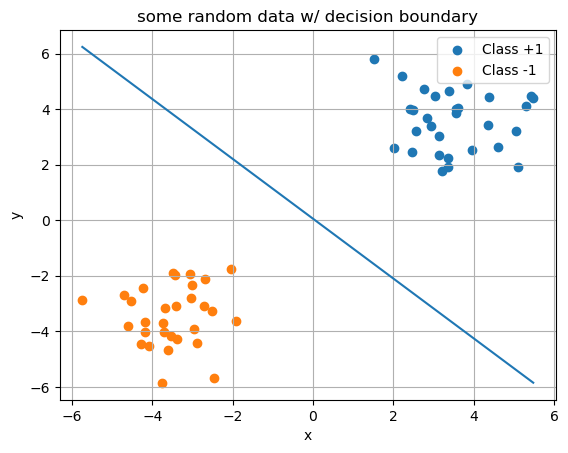

In [137]:
# STEP 3: Visualize SVM
def visualize_svm(X, y, w, b, title="some random data w/ decision boundary"):
    '''
    Visualize data and its decision boundary
    '''
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Class -1')
    plt.title(title)

    # Set correct boundaries, s.t. the line covers desired x-range
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    x = np.array([x_min, x_max])
    
    if w[1] != 0:
        y = -(w[0] * x + b) / w[1] # same as w0 * x + w1 * y + b = 0
        plt.plot(x, y)
    else:
        plt.axvline(-b / w[0]) 

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_svm(X, y, w, b)